In [21]:
import numpy as np
from matplotlib import pyplot as plt
import torch

from src.data import get_single_cifar10_dataloader as get_cifar10_dataloader

In [22]:
c10dl = get_cifar10_dataloader(target_class=4, batch_size=16, num_workers=1)[0]

100%|██████████| 170498071/170498071 [00:25<00:00, 6642263.99it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [23]:
def get_sample():
    for batch in c10dl:
        return batch[0]

In [24]:
sample_imgs = get_sample()

In [25]:
sample_imgs.shape

torch.Size([16, 3, 32, 32])

In [26]:
sample_imgs.min()

tensor(-1.)

In [27]:
sample_imgs.max()

tensor(1.)

In [28]:
def show_imgs(imgs):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(imgs):
        plt.subplot(4, 4, i+1)
        plt.imshow(np.transpose((img+1)/2.0, (1, 2, 0)))
        plt.axis('off')
    plt.show()

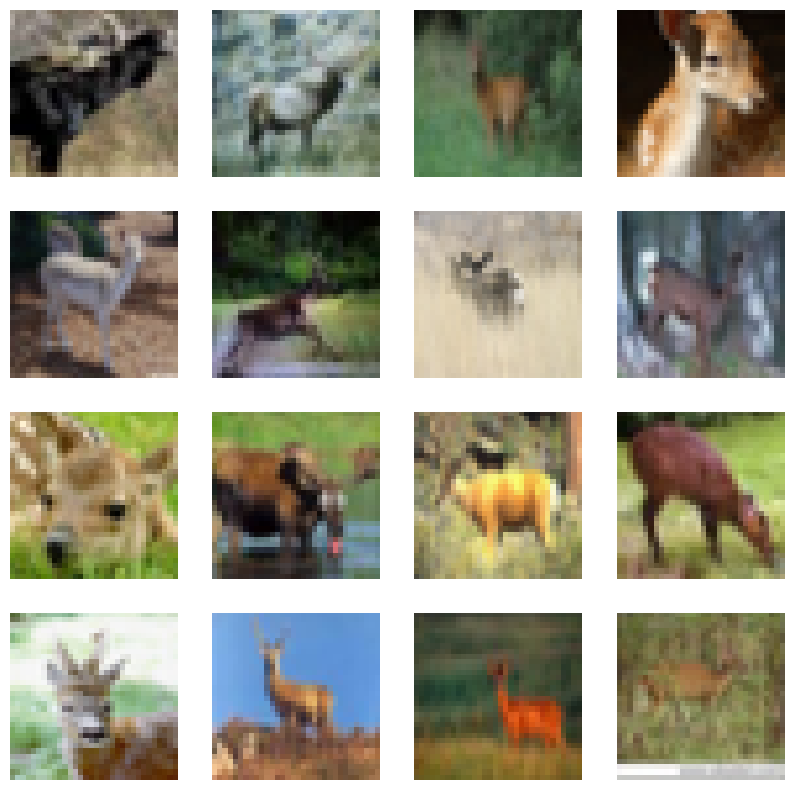

In [29]:
show_imgs(sample_imgs)

In [31]:
high_std_array = np.random.normal(loc=0.0, scale=10.0, size=(16, 3, 32, 32))
low_std_array = np.random.normal(loc=0.0, scale=0.1, size=(16, 3, 32, 32))

In [40]:
# Flattening the arrays
high_std_flattened = high_std_array.reshape(high_std_array.shape[0], -1)
low_std_flattened = low_std_array.reshape(low_std_array.shape[0], -1)
sample_imgs_flattened = sample_imgs.reshape(sample_imgs.shape[0], -1)


In [42]:
def calculate_diversity(input_array: np.ndarray) -> float:
    input_tensor = torch.tensor(input_array)  # Convert numpy array to torch tensor
    
    # Ensure the tensor is in the right shape (n_samples, n_features)
    if input_tensor.dim() != 2:
        raise ValueError("Input tensor must be 2-dimensional (n_samples, n_features)")
    
    # Calculate pairwise distances
    n_samples = input_tensor.size(0)
    distances = torch.norm(input_tensor[:, None] - input_tensor, dim=2, p=2)
    
    # Mask to exclude self-distances (diagonal) from the average
    mask = ~torch.eye(n_samples, dtype=bool)
    
    # Calculate the average distance, excluding self-distances
    avg_distance = torch.mean(distances[mask]).item()  # Convert to Python float
    
    return avg_distance

In [33]:
def calculate_quality(input_tensor) -> float:
    return 0.0

## Testing the Code

### Image Diversity

This should return a high value since the noise array `high_std_array` has a high standard deviation

In [43]:
calculate_diversity(high_std_flattened)

783.146007810041

This should return a **low** value since the noise array `low_std_array` has a low standard deviation

In [44]:
calculate_diversity(low_std_flattened)

7.837950618417866

This should return a value roughly between a tensor with very low standard deviation and very high standard deviation
because artificially generated noise with very high std should have a higher variety than real images but in comparison
to `low_std_array` it should be higher since the deers have _some_ variance.

In [45]:
calculate_diversity(sample_imgs)

/tmp/ipykernel_39866/3010052328.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_array)  # Convert numpy array to torch tensor


ValueError: Input tensor must be 2-dimensional (n_samples, n_features)

### Image Quality

This should return a **high** value since the image quality of **real** images is high (basically "as good as it gets")

In [37]:
calculate_quality(sample_imgs)

0.0

This should return a **low** value since the image quality of noise poor (there is basically no real image features)

In [38]:
calculate_quality(low_std_array)

0.0